In [1]:
import pandas as pd
import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as plt
%matplotlib inline
from pyfolio.timeseries import perf_stats

In [2]:
# download different test results
singles = pd.read_pickle('results/single_parameter_results.pickle')
combinations = pd.read_pickle('results/combined_parameter_results.pickle')
mas_breakout = pd.read_pickle('results/mas_breakout.pickle')
stop_risk = pd.read_pickle('results/stop_risk.pickle')
vol_freq = pd.read_pickle('results/vol_freq.pickle')
exp_days = pd.read_pickle('results/exp_days.pickle')

In [3]:
def extract_stats(results):
    return pd.DataFrame(OrderedDict([(strategy, perf_stats(df.returns)) for strategy, df in results.items()]))

## Portfolio optimization method selection

no_opt - results without optimization on portfolio level, only position level optimizations
other test for using only one portfolio optimization method
cap_exp - limit on single position size
corr_1, corr_2 - two different methods of correcting position size for intstruments correlation with other instruments
vol_target - size adjustment for every new position to target given portfolio volatility (without adjustments to existing positions) 

In [4]:
singles_ratios = extract_stats(singles)
singles_ratios

,corr_2,cap_exp,no_opt,corr_1,vol_target
Annual return,0.099325,0.121513,0.120837,0.140590,0.100945
Cumulative returns,0.737409,0.952203,0.945345,1.154054,0.752402
Annual volatility,0.217646,0.207368,0.207511,0.207849,0.160050
Sharpe ratio,0.543865,0.656733,0.653519,0.736695,0.680954
Calmar ratio,0.246884,0.404884,0.398902,0.382225,0.347217
Stability,0.469386,0.671299,0.669008,0.628569,0.576158
Max drawdown,-0.402313,-0.300118,-0.302923,-0.367821,-0.290727
Omega ratio,1.100653,1.120798,1.120175,1.137392,1.121484
Sortino ratio,0.783538,0.956025,0.950684,1.088111,0.987862
Skew,0.076715,0.023720,0.020612,0.243059,-0.030947


Results for combination of several portfolio optimization methods.
cap_vol_reb - position max size cap, volatility targetting with rebalancing of existing positions
corr_cap - correlation based adjustments method 1 and position cap, no rebalancing of existing positions
corr_cap_vol - same as above plus volatility targetting
corr_cap_vol_reb - same as above but with rebalancing of existing positions

In [5]:
combinations_ratios = extract_stats(combinations)
combinations_ratios

,corr_cap_vol,corr_cap_vol_reb,cap_vol_reb,corr_cap
Annual return,0.101491,0.129692,0.104318,0.138096
Cumulative returns,0.757473,1.036731,0.783951,1.126719
Annual volatility,0.159328,0.166973,0.170240,0.205692
Sharpe ratio,0.686351,0.813852,0.668052,0.731588
Calmar ratio,0.286487,0.475938,0.404101,0.389275
Stability,0.480749,0.696569,0.667087,0.640445
Max drawdown,-0.354260,-0.272498,-0.258149,-0.354752
Omega ratio,1.122863,1.147124,1.119229,1.135939
Sortino ratio,1.005382,1.203984,0.967710,1.081352
Skew,0.122148,0.102502,-0.034113,0.271307


*Selected:* **corr_cap_vol_reb**  based on Sharpe

## Parameter optimization - moving averages periods and breakout periods

*column names consist of:
f - fast moving average periods,
s - slow moving average periods,
b - breakout periods*

In [6]:
#fast moving average, slow moving average, breakout periods
mas_breakout_ratios = extract_stats(mas_breakout)
mas_breakout_ratios

,f50_s400_b75,f10_s200_b25,f75_s200_b25,f25_s100_b50,f10_s300_b100,f25_s100_b25,f50_s200_b100,f25_s400_b50,f10_s300_b75,f25_s100_b75,...,f25_s100_b100,f75_s100_b50,f50_s100_b100,f50_s300_b25,f50_s100_b25,f10_s200_b50,f25_s400_b75,f25_s300_b50,f75_s200_b100,f10_s100_b75
Annual return,0.061205,0.130096,0.131040,0.122700,0.138271,0.143382,0.107273,0.077852,0.126472,0.118563,...,0.127116,0.125898,0.144611,0.114254,0.115590,0.120089,0.066770,0.126744,0.117347,0.125574
Cumulative returns,0.414150,1.040981,1.050945,0.964284,1.128627,1.184988,0.811973,0.548562,1.003094,0.922438,...,1.009787,0.997153,1.198729,0.879634,0.892825,0.937793,0.457961,1.005924,0.910275,0.993805
Annual volatility,0.153964,0.180910,0.174650,0.180026,0.168238,0.183336,0.162583,0.161774,0.170113,0.176824,...,0.174377,0.176052,0.171278,0.176240,0.177725,0.171336,0.157038,0.168101,0.161926,0.179086
Sharpe ratio,0.462760,0.766452,0.792432,0.732817,0.853943,0.822466,0.708072,0.544264,0.785096,0.721977,...,0.773447,0.761533,0.874208,0.701961,0.704191,0.747573,0.490097,0.793932,0.766176,0.750003
Calmar ratio,0.144262,0.448637,0.555992,0.563367,0.442839,0.686576,0.334928,0.181278,0.397877,0.457750,...,0.453455,0.562982,0.657322,0.335564,0.516734,0.439949,0.164543,0.428150,0.385527,0.572312
Stability,0.099330,0.644451,0.732829,0.790430,0.639348,0.832399,0.561186,0.114286,0.578419,0.760533,...,0.770463,0.798909,0.824063,0.533743,0.793267,0.682461,0.144745,0.601768,0.620709,0.822410
Max drawdown,-0.424262,-0.289980,-0.235686,-0.217797,-0.312238,-0.208836,-0.320286,-0.429462,-0.317866,-0.259012,...,-0.280328,-0.223627,-0.220001,-0.340482,-0.223694,-0.272962,-0.405790,-0.296028,-0.304380,-0.219416
Omega ratio,1.080877,1.137809,1.142881,1.130026,1.154328,1.146641,1.125746,1.095980,1.141999,1.128151,...,1.138126,1.134674,1.156853,1.126351,1.125324,1.131318,1.085922,1.142091,1.137667,1.133758
Sortino ratio,0.669526,1.132698,1.160541,1.085983,1.267944,1.228001,1.029778,0.792555,1.162595,1.070184,...,1.131483,1.130088,1.299108,1.030920,1.047171,1.101838,0.706317,1.178028,1.128071,1.113546
Skew,0.093170,0.180060,0.055463,0.220729,0.162746,0.215242,0.054902,0.101284,0.190922,0.224083,...,0.080078,0.192326,0.210480,0.100524,0.290331,0.112973,0.010760,0.155592,0.174800,0.225012


In [7]:
# rank results by Sharpe
mas_breakout_ratios.loc['Sharpe ratio'].sort_values(ascending=False)

f10_s100_b50     0.984530
f50_s300_b50     0.931265
f50_s300_b75     0.898263
f50_s100_b100    0.874208
f10_s300_b100    0.853943
f75_s100_b100    0.850972
f10_s300_b50     0.849112
f50_s300_b100    0.848818
f25_s100_b25     0.822466
f25_s300_b100    0.822405
f50_s200_b50     0.813852
f75_s300_b50     0.810718
f25_s300_b50     0.793932
f50_s100_b50     0.793363
f75_s200_b25     0.792432
f25_s300_b75     0.791408
f10_s300_b75     0.785096
f75_s200_b50     0.776572
f25_s100_b100    0.773447
f10_s400_b25     0.769415
f10_s200_b25     0.766452
f75_s200_b100    0.766176
f75_s300_b100    0.764753
f75_s100_b50     0.761533
f50_s100_b75     0.754907
f10_s200_b75     0.754753
f10_s100_b75     0.750003
f10_s200_b50     0.747573
f50_s200_b25     0.739165
f25_s200_b50     0.736912
                   ...   
f10_s300_b25     0.712278
f50_s200_b100    0.708072
f75_s200_b75     0.706614
f50_s100_b25     0.704191
f50_s300_b25     0.701961
f10_s400_b50     0.697316
f10_s100_b25     0.695330
f75_s300_b25

In [8]:
def draw_charts(fast_ma):
    # choose only columns with given fast_ma
    f = mas_breakout_ratios.columns[mas_breakout_ratios.columns.str.startswith('f{}'.format(fast_ma))]
    # create a list of columns for given breakout level
    breakouts = [mas_breakout_ratios.columns[mas_breakout_ratios.columns.str.endswith('b{}'.format(b))]
                 for b in [25, 50, 75, 100]]
    # create a list of dfs with columns only with given fast_ma and particular level of breakout
    intersections = [mas_breakout_ratios[f.intersection(b)] for b in breakouts]
    # rename columns to the value of slow moving average
    for i in intersections:
        i.columns = i.columns.map(lambda x: x.split('_')[1][-3:])

    sharpes = [df.loc['Sharpe ratio'] for df in intersections]
    returns = [df.loc['Annual return'] for df in intersections]
    drawdowns = [df.loc['Max drawdown'] for df in intersections]
    
    
    fig = plt.figure(figsize=(18,4))
    labels = ['breakout 25', 'breakout 50', 'breakout 75', 'breakout 100']
    charts = ['Sharpe', 'Returns', 'Drawdowns']
    ax = []
    for number, ratio in enumerate([sharpes, returns, drawdowns]):
        line = []
        ax.append(fig.add_subplot(1,3, number+1))
        for index, r  in enumerate(ratio):
            line.append(ax[number].plot(r)[0])
            line[index].set_label(labels[index])           

        ax[number].set_xlabel('Slow moving average')
        ax[number].legend()
        ax[number].set_title(charts[number])
        ax[number].grid()
    plt.suptitle('Ratios for fast moving average={} by length of slow moving average and number of breakout periods'.format(fast_ma))
    plt.show();

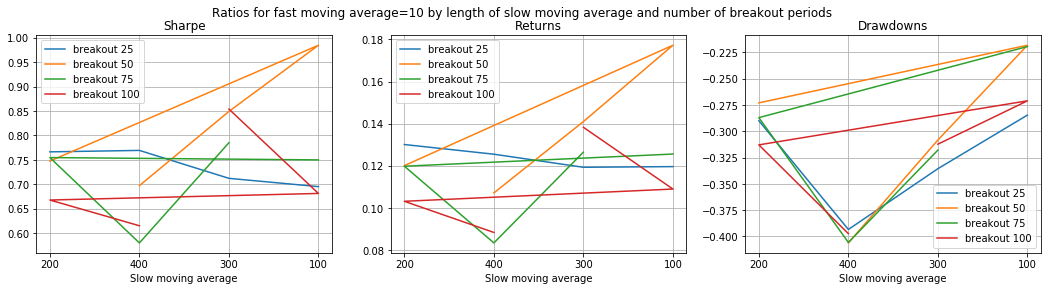

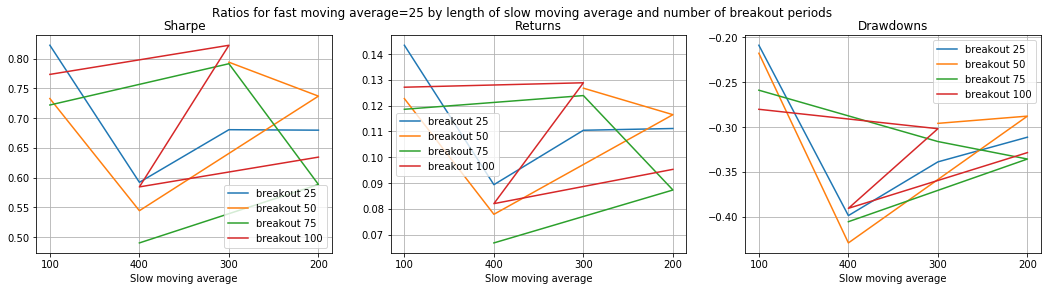

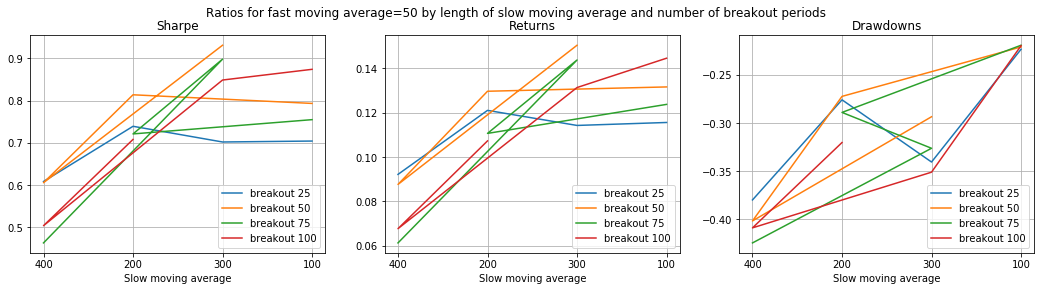

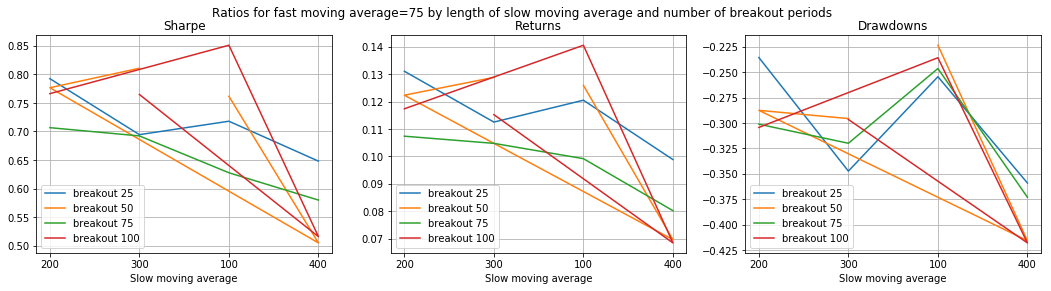

In [9]:
for f in [10, 25, 50, 75]:
    draw_charts(f)

In [10]:
mas_breakout_ratios.loc['Sharpe ratio'].max()

0.9845304746498758

In [11]:
mas_breakout_ratios.loc['Max drawdown'].max()

-0.2088360770828695

In [12]:
mas_breakout_ratios.loc['Annual return'].max()

0.177233014920676

In [13]:
def limit_options(df, md=-.25, ar=.15):
    return df.T[(df.T['Max drawdown'] > md) & (df.T['Annual return'] > ar)].T

Below are the only options that meet minimum max drawdown and average return requirements.

In [14]:
limit_options(mas_breakout_ratios)

,f10_s100_b50
Annual return,0.177233
Cumulative returns,1.590384
Annual volatility,0.182689
Sharpe ratio,0.984530
Calmar ratio,0.812371
Stability,0.892251
Max drawdown,-0.218167
Omega ratio,1.179049
Sortino ratio,1.486004
Skew,0.200564


*Selected:* **f10_s100_b50**   based on Sharpe

## Parameter optimization - stop loss and risk per position

*Column names consist of: st - stop loss distance in ATRs from last top/bottom, r - risk parameter in portfolio % of daily loss per position*

In [15]:
# stop loss ATRs and risk per position
stop_risk_ratios = extract_stats(stop_risk)
stop_risk_ratios

,st4_r0.4,st3_r0.2,st2_r0.3,st3_r0.3,st2_r0.4,st2_r0.2,st3_r0.4,st1_r0.1,st4_r0.2,st1_r0.3,st2_r0.1,st3_r0.1,st1_r0.4,st4_r0.3,st4_r0.1,st1_r0.2
Annual return,0.165707,0.139260,0.129694,0.177233,0.161674,0.123539,0.209591,0.075803,0.105330,0.169822,0.069759,0.086827,0.182691,0.149270,0.080363,0.109558
Cumulative returns,1.445893,1.139434,1.036750,1.590384,1.396945,0.972861,2.034300,0.531469,0.793503,1.496699,0.481952,0.625307,1.661232,1.251452,0.569723,0.833897
Annual volatility,0.223754,0.148797,0.169533,0.182689,0.196884,0.137885,0.211332,0.085211,0.156385,0.146038,0.093224,0.100408,0.168005,0.193563,0.107129,0.119442
Sharpe ratio,0.797119,0.950670,0.804060,0.984530,0.859586,0.913730,1.006077,0.900175,0.718610,1.147231,0.770008,0.879499,1.082891,0.815662,0.775157,0.930222
Calmar ratio,0.662693,0.752096,0.460803,0.812371,0.513878,0.529006,0.845433,0.598139,0.568505,0.910018,0.346180,0.625799,0.864408,0.721746,0.605593,0.583691
Stability,0.827532,0.902227,0.838416,0.892251,0.869168,0.866750,0.885731,0.889929,0.801827,0.936738,0.769976,0.867136,0.937184,0.860726,0.841595,0.896980
Max drawdown,-0.250050,-0.185162,-0.281452,-0.218167,-0.314616,-0.233530,-0.247910,-0.126732,-0.185275,-0.186614,-0.201510,-0.138746,-0.211348,-0.206818,-0.132701,-0.187698
Omega ratio,1.142097,1.173415,1.145352,1.179049,1.156279,1.166930,1.183853,1.165205,1.127949,1.212579,1.138077,1.158801,1.199679,1.145683,1.138682,1.169265
Sortino ratio,1.174910,1.429061,1.202042,1.486004,1.289790,1.390083,1.522162,1.342161,1.047748,1.751439,1.137392,1.316159,1.639436,1.189782,1.131463,1.385020
Skew,0.104671,0.207539,0.183222,0.200564,0.190892,0.313618,0.219526,0.041870,0.009196,0.186275,0.043741,0.154357,0.132451,-0.012670,-0.000061,0.055098


In [16]:
stop_risk_ratios.loc['Sharpe ratio'].sort_values(ascending=False)

st1_r0.3    1.147231
st1_r0.4    1.082891
st3_r0.4    1.006077
st3_r0.3    0.984530
st3_r0.2    0.950670
st1_r0.2    0.930222
st2_r0.2    0.913730
st1_r0.1    0.900175
st3_r0.1    0.879499
st2_r0.4    0.859586
st4_r0.3    0.815662
st2_r0.3    0.804060
st4_r0.4    0.797119
st4_r0.1    0.775157
st2_r0.1    0.770008
st4_r0.2    0.718610
Name: Sharpe ratio, dtype: float64

In [17]:
stop_risk_ratios.loc['Annual return'].sort_values(ascending=False)

st3_r0.4    0.209591
st1_r0.4    0.182691
st3_r0.3    0.177233
st1_r0.3    0.169822
st4_r0.4    0.165707
st2_r0.4    0.161674
st4_r0.3    0.149270
st3_r0.2    0.139260
st2_r0.3    0.129694
st2_r0.2    0.123539
st1_r0.2    0.109558
st4_r0.2    0.105330
st3_r0.1    0.086827
st4_r0.1    0.080363
st1_r0.1    0.075803
st2_r0.1    0.069759
Name: Annual return, dtype: float64

In [18]:
stop_risk_ratios.loc['Max drawdown'].sort_values(ascending=False)

st1_r0.1   -0.126732
st4_r0.1   -0.132701
st3_r0.1   -0.138746
st3_r0.2   -0.185162
st4_r0.2   -0.185275
st1_r0.3   -0.186614
st1_r0.2   -0.187698
st2_r0.1   -0.201510
st4_r0.3   -0.206818
st1_r0.4   -0.211348
st3_r0.3   -0.218167
st2_r0.2   -0.233530
st3_r0.4   -0.247910
st4_r0.4   -0.250050
st2_r0.3   -0.281452
st2_r0.4   -0.314616
Name: Max drawdown, dtype: float64

In [19]:
def draw_charts_1():
    def get_intersections(st):
        # choose only columns with given stop loss level
        f = stop_risk_ratios.columns[stop_risk_ratios.columns.str.startswith('st{}'.format(st))]
        # create a list of columns for given breakout level
        risk = [stop_risk_ratios.columns[stop_risk_ratios.columns.str.endswith('r{}'.format(r))]
                     for r in [.1, .2, .3, .4]]
        # create a list of dfs with columns only with given fast_ma and particular level of breakout
        intersections = [stop_risk_ratios[f.intersection(r)] for r in risk]
        # rename columns to the value of slow moving average
        for i in intersections:
            i.columns = i.columns.map(lambda x: x.split('_')[1][-3:])
        intersections = pd.concat([pd.DataFrame(i) for i in intersections], axis=1)
        return intersections

    intersections = [get_intersections(i) for i in [1, 2, 3, 4]]
        
    
    sharpes = [df.loc['Sharpe ratio'] for df in intersections]
    returns = [df.loc['Annual return'] for df in intersections]
    drawdowns = [df.loc['Max drawdown'] for df in intersections]
    
    
    fig = plt.figure(figsize=(18, 6))
    labels = ['stop loss 1 ATR', 'stop loss 2 ATRs', 'stop loss 3 ATRs', 'stop loss 4 ATRs']
    charts = ['Sharpe', 'Returns', 'Drawdowns']
    ax = []
    for number, ratio in enumerate([sharpes, returns, drawdowns]):
        line = []
        ax.append(fig.add_subplot(1,3, number+1))
        for index, r  in enumerate(ratio):
            line.append(ax[number].plot(r)[0])
            line[index].set_label(labels[index])           

        ax[number].set_xlabel('Risk level')
        ax[number].legend()
        ax[number].set_title(charts[number])
        ax[number].grid()
    plt.suptitle('Ratios by stop loss ATRs and risk level')
    plt.show();

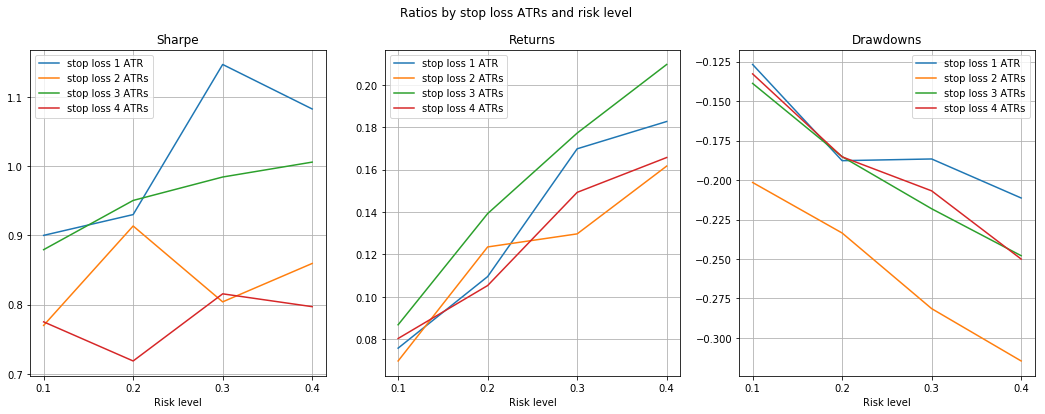

In [20]:
draw_charts_1()

Filter results to leave only options meeting minimum return and max drawdown requirements.

In [21]:
limit_options(stop_risk_ratios)

,st3_r0.3,st3_r0.4,st1_r0.3,st1_r0.4
Annual return,0.177233,0.209591,0.169822,0.182691
Cumulative returns,1.590384,2.034300,1.496699,1.661232
Annual volatility,0.182689,0.211332,0.146038,0.168005
Sharpe ratio,0.984530,1.006077,1.147231,1.082891
Calmar ratio,0.812371,0.845433,0.910018,0.864408
Stability,0.892251,0.885731,0.936738,0.937184
Max drawdown,-0.218167,-0.247910,-0.186614,-0.211348
Omega ratio,1.179049,1.183853,1.212579,1.199679
Sortino ratio,1.486004,1.522162,1.751439,1.639436
Skew,0.200564,0.219526,0.186275,0.132451


In [22]:
def draw_risk_return(df):
    returns = df.loc['Annual return']
    drawdowns = df.loc['Max drawdown']
    sharpes = (6 * 4 * df.loc['Sharpe ratio']) **2
    labels = df.columns

    plt.figure(figsize=(18,7))
    plt.subplot(111)
    plt.scatter(returns, drawdowns, s=sharpes)
    plt.xlabel('Returns')
    plt.ylabel('Max Drawdown')
    plt.grid()
    for i, txt in enumerate(labels):
        plt.annotate(txt, (returns[i], drawdowns[i]), textcoords="offset points", xytext=(-20,-20))


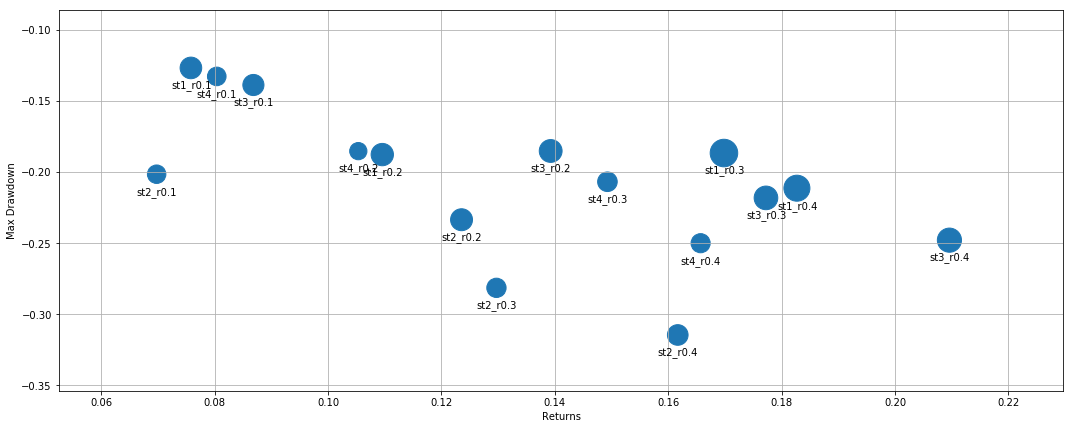

In [23]:
draw_risk_return(stop_risk_ratios)

*Selected:* **st1_r0.3**   based on Sharpe

## Parameter optimization - volatility target and rebalancing frequency

*Column names consist of: vol - volatility target (annualized portfolio daily returns std), freq - rebalancing frequency in days*

In [24]:
vol_freq_ratios = extract_stats(vol_freq)
vol_freq_ratios

,vol0.14_freq0,vol0.1_freq5,vol0.14_freq5,vol0.08_freq21,vol0.1_freq0,vol0.14_freq21,vol0.12_freq5,vol0.08_freq0,vol0.08_freq5,vol0.1_freq21,vol0.12_freq21,vol0.12_freq0
Annual return,0.155263,0.154736,0.179335,0.089417,0.112311,0.133736,0.169822,0.100116,0.127815,0.108324,0.123641,0.144652
Cumulative returns,1.320802,1.314638,1.617478,0.648030,0.860600,1.079636,1.496699,0.744711,1.017071,0.822037,0.973911,1.199188
Annual volatility,0.153783,0.131592,0.159959,0.109543,0.123703,0.160172,0.146038,0.106606,0.113650,0.128484,0.146999,0.138800
Sharpe ratio,1.015480,1.159304,1.111327,0.836685,0.922351,0.863848,1.147231,0.948398,1.115353,0.864791,0.866606,1.042849
Calmar ratio,0.752507,0.954845,0.875057,0.480746,0.624056,0.569541,0.910018,0.679411,0.833841,0.495988,0.573063,0.796740
Stability,0.874753,0.932911,0.936338,0.830141,0.850203,0.851824,0.936738,0.849527,0.922761,0.871846,0.865777,0.884537
Max drawdown,-0.206327,-0.162054,-0.204941,-0.185995,-0.179969,-0.234814,-0.186614,-0.147356,-0.153285,-0.218401,-0.215755,-0.181555
Omega ratio,1.188389,1.214198,1.205701,1.153315,1.169305,1.160645,1.212579,1.175259,1.206325,1.159434,1.161757,1.193711
Sortino ratio,1.546727,1.763390,1.692959,1.239375,1.391351,1.282064,1.751439,1.434880,1.682264,1.291183,1.292744,1.583451
Skew,0.232626,0.131566,0.191107,-0.054930,0.202094,0.014736,0.186275,0.212479,0.068889,0.103854,0.085553,0.205308


In [25]:
vol_freq_ratios.loc['Sharpe ratio'].sort_values(ascending=False)

vol0.1_freq5      1.159304
vol0.12_freq5     1.147231
vol0.08_freq5     1.115353
vol0.14_freq5     1.111327
vol0.12_freq0     1.042849
vol0.14_freq0     1.015480
vol0.08_freq0     0.948398
vol0.1_freq0      0.922351
vol0.12_freq21    0.866606
vol0.1_freq21     0.864791
vol0.14_freq21    0.863848
vol0.08_freq21    0.836685
Name: Sharpe ratio, dtype: float64

In [26]:
vol_freq_ratios.loc['Max drawdown'].sort_values(ascending=False)

vol0.08_freq0    -0.147356
vol0.08_freq5    -0.153285
vol0.1_freq5     -0.162054
vol0.1_freq0     -0.179969
vol0.12_freq0    -0.181555
vol0.08_freq21   -0.185995
vol0.12_freq5    -0.186614
vol0.14_freq5    -0.204941
vol0.14_freq0    -0.206327
vol0.12_freq21   -0.215755
vol0.1_freq21    -0.218401
vol0.14_freq21   -0.234814
Name: Max drawdown, dtype: float64

In [27]:
vol_freq_ratios.loc['Annual return'].sort_values(ascending=False)

vol0.14_freq5     0.179335
vol0.12_freq5     0.169822
vol0.14_freq0     0.155263
vol0.1_freq5      0.154736
vol0.12_freq0     0.144652
vol0.14_freq21    0.133736
vol0.08_freq5     0.127815
vol0.12_freq21    0.123641
vol0.1_freq0      0.112311
vol0.1_freq21     0.108324
vol0.08_freq0     0.100116
vol0.08_freq21    0.089417
Name: Annual return, dtype: float64

In [28]:
limit_options(vol_freq_ratios)

,vol0.14_freq0,vol0.1_freq5,vol0.14_freq5,vol0.12_freq5
Annual return,0.155263,0.154736,0.179335,0.169822
Cumulative returns,1.320802,1.314638,1.617478,1.496699
Annual volatility,0.153783,0.131592,0.159959,0.146038
Sharpe ratio,1.015480,1.159304,1.111327,1.147231
Calmar ratio,0.752507,0.954845,0.875057,0.910018
Stability,0.874753,0.932911,0.936338,0.936738
Max drawdown,-0.206327,-0.162054,-0.204941,-0.186614
Omega ratio,1.188389,1.214198,1.205701,1.212579
Sortino ratio,1.546727,1.763390,1.692959,1.751439
Skew,0.232626,0.131566,0.191107,0.186275


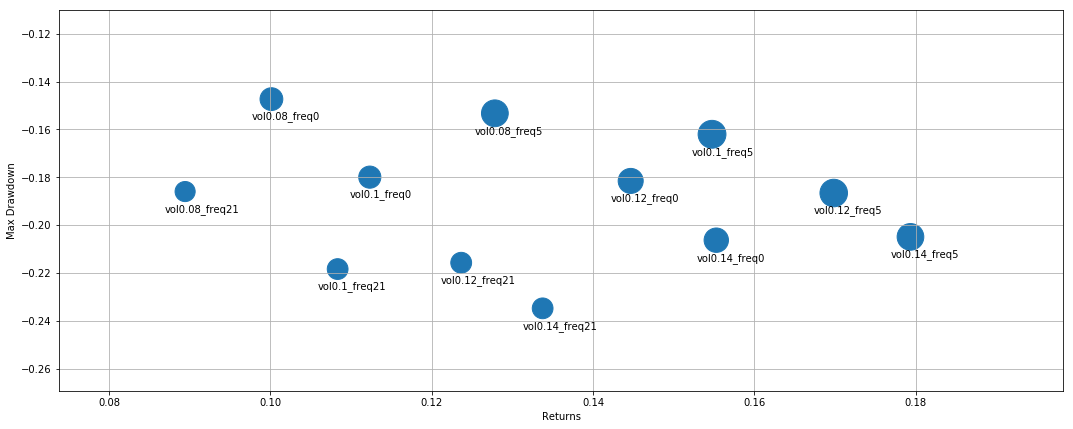

In [29]:
draw_risk_return(vol_freq_ratios)

*Selected:* **vol0.10_freq5** based on: Sharpe

## Parameter optimization - position cap and volatility lookback window

*Column names contain: exp - single position cap, days - volatility lookback window* 

In [30]:
exp_days_ratios =extract_stats(exp_days)
exp_days_ratios

,exp100_days60,exp25_days20,exp25_days60,exp100_days125,exp25_days125,exp50_days125,exp50_days60,exp100_days20,exp50_days20
Annual return,0.148116,0.150600,0.144856,0.151567,0.142859,0.155096,0.150000,0.153364,0.154736
Cumulative returns,1.238298,1.266686,1.201475,1.277827,1.179167,1.318852,1.259804,1.298637,1.314638
Annual volatility,0.129507,0.130977,0.128344,0.128520,0.127747,0.128170,0.129038,0.132581,0.131592
Sharpe ratio,1.131438,1.136723,1.118366,1.162481,1.109312,1.189187,1.147777,1.142666,1.159304
Calmar ratio,0.847228,0.965362,0.846768,0.946841,0.916670,0.996116,0.876273,0.936727,0.954845
Stability,0.941352,0.924556,0.935732,0.941270,0.937767,0.945764,0.940923,0.930208,0.932911
Max drawdown,-0.174825,-0.156003,-0.171069,-0.160077,-0.155846,-0.155701,-0.171179,-0.163723,-0.162054
Omega ratio,1.211009,1.209867,1.208017,1.218487,1.207032,1.223983,1.214143,1.211348,1.214198
Sortino ratio,1.724694,1.724976,1.700146,1.784108,1.690669,1.831422,1.757272,1.735103,1.763390
Skew,0.176401,0.118703,0.151533,0.230225,0.190645,0.251577,0.212525,0.123308,0.131566


In [31]:
exp_days_ratios.loc['Sharpe ratio'].sort_values(ascending=False)

exp50_days125     1.189187
exp100_days125    1.162481
exp50_days20      1.159304
exp50_days60      1.147777
exp100_days20     1.142666
exp25_days20      1.136723
exp100_days60     1.131438
exp25_days60      1.118366
exp25_days125     1.109312
Name: Sharpe ratio, dtype: float64

*Selected:* **exp50_days125** based on Sharpe

## Results

Optimizations were performed on data for 6-year period of 2013-2018 (in-sample), results are for period 2007-2012 (out-of-sample) using optimized parameters.

baseline - no optimizations,<br>
out_of_sample - all optimizations as per process described above<br>
max_return - different set of parameters that during optimization (on in-sample data) demonstrated better returns with only slight deterioration in Sharpe, 'expert' judgment on what parameters would make more sense based on various in-sample results.

parameters for max_return: f = 50, s = 300, b = 50, st = 3, r = .4, cap = 50, freq = 5, vol target = .12, with rebalancing, correlation adjustments type 1 and volatility targeting. 

In [32]:
baseline = pd.read_pickle('results/baseline_2007-2012.pickle')
out_of_sample = pd.read_pickle('results/out_of_sample_2007-2012.pickle')
max_return = pd.read_pickle('results/maximize_return_2007-2012.pickle')
results = extract_stats(OrderedDict([('baseline', baseline),
                                    ('out_of_sample', out_of_sample),
                                    ('max_return', max_return),
                                    ]))
results

,baseline,out_of_sample,max_return
Annual return,0.154587,0.133803,0.219377
Cumulative returns,1.366272,1.122229,2.282038
Annual volatility,0.264593,0.139363,0.208470
Sharpe ratio,0.679687,0.970909,1.056089
Calmar ratio,0.345092,0.901292,1.014580
Stability,0.867426,0.877076,0.872539
Max drawdown,-0.447958,-0.148457,-0.216224
Omega ratio,1.150578,1.193789,1.210520
Sortino ratio,0.906172,1.429629,1.533667
Skew,-2.307295,0.039362,-0.158909


*Suck it Dalio.*